# Apple and Google Tweet Sentiment Analysis

## Introduction

In today's digital economy, social media platforms serve as critical touchpoints between consumers and brands. Tweets, in particular, offer real-time insights into public opinion, customer satisfaction, and brand perception. This project leverages Natural Language Processing (NLP) techniques to analyze public sentiment toward Apple and Google products. By using a dataset of 9,093 tweets, each labeled as positive, negative, or neutral, we aim to develop predictive models capable of accurately classifying sentiment. 

This project demonstrates advanced supervised machine learning methods applied to textual data. We will begin with a binary classification approach, distinguishing positive from negative sentiment, before expanding to multiclass classification to include neutral tweets. Additionally, advanced NLP techniques, such as TF-IDF vectorization, word embeddings, and optionally transformer-based models like BERT, will be considered to enhance performance. The final deliverables will include a reproducible workflow, evaluation metrics, and actionable insights for stakeholders.

The primary objective is to create a proof-of-concept sentiment analysis system that not only predicts sentiment accurately but also provides interpretable insights for decision-making. This project highlights a structured, end-to-end NLP pipeline, demonstrating our proficiency in data preprocessing, feature engineering, model development, evaluation, and business-oriented interpretation of results.

---

## Business Understanding

Understanding public sentiment on social media is crucial for technology companies such as Apple and Google. Stakeholders—including product managers, marketing teams, and customer experience departments—rely on timely, actionable insights to make informed decisions regarding product development, brand positioning, and customer engagement strategies.

The objectives of this project are threefold:

1. **Sentiment Classification:** Develop models capable of automatically classifying tweets as positive, negative, or neutral, thereby quantifying customer sentiment at scale.
2. **Trend Analysis:** Identify patterns in public opinion to detect emerging issues, customer satisfaction levels, and potential product strengths or weaknesses.
3. **Business Actionability:** Enable stakeholders to implement data-driven interventions, such as addressing negative feedback promptly, amplifying positive experiences, or tailoring marketing campaigns to current sentiment trends.

The business value of this project lies in its ability to transform unstructured social media data into structured, actionable intelligence. Accurate sentiment analysis enables proactive brand management, real-time product monitoring, and improved customer engagement. By providing both predictive accuracy and interpretability, this project empowers stakeholders to make strategic decisions that directly impact brand perception and customer satisfaction.


## Data Understanding

The dataset originates from CrowdFlower via data.world and contains **9,093 labeled tweets** spanning multiple brands and products. Contributors manually annotated each tweet based on sentiment: positive, negative, or neutral. When sentiment was expressed, the specific target brand or product was also identified, enabling granular analysis.

### Key Properties of the Dataset:
- **Text content:** Raw tweet messages containing informal language, abbreviations, hashtags, mentions, emojis, and other social media-specific text features.
- **Sentiment label:** Target variable with three classes: `positive`, `negative`, `neutral`.
- **Target brand/product (optional):** Identifies which product or brand the sentiment pertains to, enabling more nuanced analysis if required.

### Dataset Utility:
- **Supervised Learning Suitability:** The presence of labeled sentiment allows training of supervised classification models. This enables robust evaluation and iterative improvement of model performance.
- **Sample Size Adequacy:** With over 9,000 tweets, the dataset provides sufficient representation for initial model development, hyperparameter tuning, and validation.
- **Real-World Relevance:** Tweets reflect authentic, unfiltered public opinion, making insights derived from this data highly applicable to brand management and marketing strategies.

### Limitations and Challenges:
- **Language Constraints:** The dataset primarily contains English-language tweets, which may limit global applicability.
- **Text Complexity:** Tweets include slang, abbreviations, emojis, and non-standard grammar, necessitating careful preprocessing.
- **Class Imbalance:** Neutral sentiment may dominate the dataset, creating potential challenges for model learning and requiring consideration of class weighting or sampling techniques.
- **Temporal Considerations:** Tweets were collected prior to 2013; modern sentiment trends may differ, though the dataset remains valuable for modeling and methodological demonstration.

**Added:** August 30, 2013 by Kent Cavender-Bares

This dataset offers a strong foundation for building an end-to-end NLP pipeline, demonstrating data preparation, feature extraction, model development, evaluation, and business-oriented interpretation of sentiment trends.


## Data Preparation

In [97]:
# Data Handling
import pandas as pd
import numpy as np

# Text Preprocessing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Data Splitting
from sklearn.model_selection import train_test_split

# Handling Imbalance
from imblearn.over_sampling import SMOTE

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources (only need to run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [98]:
import mimetypes
print(mimetypes.guess_type("Data.csv"))

('application/vnd.ms-excel', None)


In [99]:
# Load the dataset
data = pd.read_csv("Data.xls", encoding='latin1')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [100]:
# Check basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [101]:
# Check for missing values
print(data.isnull().sum())

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64


### Data Cleaning

In [102]:
# Drop rows with missing tweet_text

data = data.dropna(subset=['tweet_text'])

In [103]:
data = data.drop(columns=['emotion_in_tweet_is_directed_at'])

In [104]:
# Rename target column for simplicity
data.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'}, inplace=True)

In [105]:
# Check sentiment value counts
print(data['sentiment'].value_counts())

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: sentiment, dtype: int64


In [106]:
# checking nulls
print(data.isnull().sum())

tweet_text    0
sentiment     0
dtype: int64


In [107]:
# Keep only Positive and Negative
binary_data = data[data['sentiment'].isin(['Positive emotion', 'Negative emotion'])].copy()

In [108]:
# Map sentiment to 0 and 1
binary_data['sentiment'] = binary_data['sentiment'].map({'Negative emotion': 0, 'Positive emotion': 1})

In [109]:
# Check class distribution
print(binary_data['sentiment'].value_counts())

1    2978
0     570
Name: sentiment, dtype: int64


### Text Preprocessing

In [110]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove mentions and hashtags

    text = re.sub(r'@\w+|#\w+', '', text)

    # 4. Remove punctuation and numbers

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 5. Tokenize
    tokens = nltk.word_tokenize(text)

    # 6. Remove stopwords and short words
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # 7. Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 8. Join back into string
    return ' '.join(tokens)

# Apply cleaning to tweet_text
binary_data['tweet_text'] = binary_data['tweet_text'].apply(clean_text)

# Preview
print(binary_data[['tweet_text']].head())


                                          tweet_text
0  iphone hr tweeting dead need upgrade plugin st...
1  know awesome ipadiphone app youll likely appre...
2                                     wait also sale
3     hope year festival isnt crashy year iphone app
4  great stuff fri marissa mayer google tim oreil...


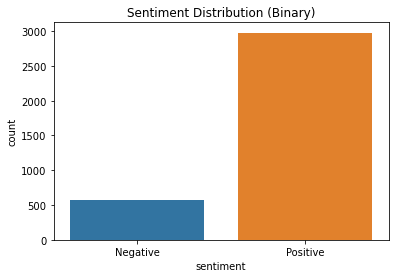

1    2978
0     570
Name: sentiment, dtype: int64


In [111]:
# Check sentiment distribution
sns.countplot(x='sentiment', data=binary_data)
plt.title("Sentiment Distribution (Binary)")
plt.xticks([0,1], ['Negative', 'Positive'])
plt.show()

# Print exact counts
print(binary_data['sentiment'].value_counts())


In [112]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE

# Split data
X = binary_data['tweet_text']
y = binary_data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # Use unigrams and bigrams
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Check original class distribution in training
print("Before SMOTE:", y_train.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Check new distribution
print("After SMOTE:", y_train_smote.value_counts())


Before SMOTE: 1    2382
0     456
Name: sentiment, dtype: int64
After SMOTE: 1    2382
0    2382
Name: sentiment, dtype: int64
